# CONFIGURAÇÕES PARA RODAR AMBIENTES GYM

In [ ]:
import sys
from IPython.display import clear_output
from google.colab import output


if 'google.colab' in sys.modules:
    !pip install gym
    !pip install gym[box2d]
    !pip install gym[toy_text]
    !pip install optuna
    
    output.clear()
    # para salvar videos
    !apt-get install -y xvfb x11-utils
    !pip install pyvirtualdisplay==0.2.*
    !apt-get install ffmpeg
    from pyvirtualdisplay import Display
    
    global display
    display = Display(visible=False, size=(1400, 900))
    _ = display.start()

    !git clone https://github.com/FernandoWeeb-byte/Taia-Project
    clear_output()

    !mv /content/Taia-Project/* /content/




# Imports necessários

In [ ]:
import optuna
import gym
import numpy as np
from tqdm import tqdm
from for_optimize_params import run_nstep_sarsa_offpolicy, run_nstep_sarsa_cv
from nstep_sarsa_off_policy import run_nstep_sarsa_offPolicy, run_nstep_sarsa_offPolicy_control_variate, run_nstep_sarsa_offPolicy_steps, run_nstep_sarsa_offPolicy_control_variate_steps
from nstep_sarsa import run_nstep_sarsa, run_nstep_sarsa_step
from wrappers import DiscreteObservationWrapper
from util_experiments import test_greedy_Q_policy, repeated_exec_steps, repeated_exec
from util_plot import plot_multiple_results

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Ambiente Taxi


## Achando os melhores parâmetros com Optuna

In [ ]:
def obj_taxi0(trial):
  env = gym.make("Taxi-v3")
  EPISODES = 10000
  LR = trial.suggest_float('LR', 0.00001, 1)
  GAMMA = trial.suggest_float('GAMMA', 0.1, 1)
  EPSILON = 1
  N_STEP = trial.suggest_int('N_STEP', 1, 100)

  rewards, Qtable = run_nstep_sarsa(env, EPISODES, N_STEP, LR, GAMMA, EPSILON, render=False)
  mean_return, episode_return = test_greedy_Q_policy(env, Qtable, 1000, render=False)

  return mean_return

In [ ]:
study_taxi0 = optuna.create_study(
    direction='maximize',
    study_name='TAXI-0',
    load_if_exists = True,
    storage = 'sqlite:////content/drive/MyDrive/taia/sqlites/TAXI-0.db'
    )

[I 2022-10-07 01:04:13,835] A new study created in RDB with name: TAXI-0


In [ ]:
study_taxi0.optimize(obj_taxi0, n_trials=100)

/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
[I 2022-10-07 01:06:18,257] Trial 0 finish

In [ ]:
def obj_taxi1(trial):
  env = gym.make("Taxi-v3")
  EPISODES = 10000
  LR = trial.suggest_float('LR', 0.00001, 1)
  GAMMA = trial.suggest_float('GAMMA', 0.1, 1)
  EPSILON = 1
  N_STEP = trial.suggest_int('N_STEP', 1, 100)

  rewards, Qtable = run_nstep_sarsa_offpolicy(env, EPISODES, N_STEP, LR, GAMMA, EPSILON, render=False)
  mean_return, episode_return = test_greedy_Q_policy(env, Qtable, 1000, render=False)

  return mean_return

In [ ]:
study_taxi1 = optuna.create_study(
    direction='maximize',
    study_name='TAXI-1',
    load_if_exists = True,
    storage = 'sqlite:////content/drive/MyDrive/taia/sqlites/TAXI-1.db'
    )

[I 2022-10-06 18:48:34,959] A new study created in RDB with name: TAXI-1


In [ ]:
study_taxi1.optimize(obj_taxi1, n_trials=100)

/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


In [ ]:
def obj_taxi2(trial):
  env = gym.make("Taxi-v3")
  EPISODES = 10000
  LR = trial.suggest_float('LR', 0.00001, 1)
  GAMMA = trial.suggest_float('GAMMA', 0.1, 1)
  EPSILON = 1
  N_STEP = trial.suggest_int('N_STEP', 1, 100)

  rewards, Qtable = run_nstep_sarsa_cv(env, EPISODES, N_STEP, LR, GAMMA, EPSILON, render=False)
  mean_return, episode_return = test_greedy_Q_policy(env, Qtable, 1000, render=False)

  return mean_return

In [ ]:
study_taxi2 = optuna.create_study(
    direction='maximize',
    study_name='TAXI-2',
    load_if_exists = True,
    storage = 'sqlite:////content/drive/MyDrive/taia/sqlites/TAXI-2.db'
    )

[I 2022-10-06 19:01:54,389] A new study created in RDB with name: TAXI-2


In [ ]:
study_taxi2.optimize(obj_taxi2, n_trials=100)

/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
[I 2022-10-06 19:04:25,625] Trial 0 finish

# Ambiente CartPole

## Achando os melhores parâmetros com Optuna

In [ ]:
def obj_cartpole1(trial):
  B1, B2, B3, B4 = trial.suggest_int('B1', 1, 100), trial.suggest_int('B2', 1, 100), trial.suggest_int('B3', 1, 100), trial.suggest_int('B4', 1, 100)

  env = gym.make("CartPole-v1")
  env = DiscreteObservationWrapper(env, [B1,B2,B3,B4])

  EPISODES = 10000
  LR = trial.suggest_float('LR', 0.00001, 1)
  GAMMA = trial.suggest_float('GAMMA', 0.1, 1)
  EPSILON = 1
  N_STEP = trial.suggest_int('N_STEP', 1, 100)

  rewards, Qtable = run_nstep_sarsa_offpolicy(env, EPISODES, N_STEP, LR, GAMMA, EPSILON, render=False)
  mean_return, episode_return = test_greedy_Q_policy(env, Qtable, 1000,render=False)


  return mean_return

In [ ]:
study_cartpole1 = optuna.create_study(
    direction='maximize',
    study_name='CARTPOLE-1',
    load_if_exists = True,
    storage = 'sqlite:////content/drive/MyDrive/taia/sqlites/CARTPOLE-1.db'
    )

[I 2022-10-04 18:10:03,474] A new study created in RDB with name: CARTPOLE-1


In [ ]:
study_cartpole1.optimize(obj_cartpole1, n_trials=200)

[I 2022-10-04 18:10:37,782] Trial 0 finished with value: 73.9 and parameters: {'B1': 67, 'B2': 97, 'B3': 19, 'B4': 70, 'LR': 0.8981097361841083, 'GAMMA': 0.4627909343558336, 'N_STEP': 8}. Best is trial 0 with value: 73.9.
[I 2022-10-04 18:10:50,994] Trial 1 finished with value: 98.4 and parameters: {'B1': 5, 'B2': 46, 'B3': 48, 'B4': 6, 'LR': 0.10830703066532456, 'GAMMA': 0.6136344787975606, 'N_STEP': 17}. Best is trial 1 with value: 98.4.
[I 2022-10-04 18:11:00,344] Trial 2 finished with value: 9.5 and parameters: {'B1': 53, 'B2': 54, 'B3': 29, 'B4': 4, 'LR': 0.975054627425707, 'GAMMA': 0.35643706338351366, 'N_STEP': 73}. Best is trial 1 with value: 98.4.
[I 2022-10-04 18:11:23,126] Trial 3 finished with value: 63.6 and parameters: {'B1': 42, 'B2': 70, 'B3': 83, 'B4': 21, 'LR': 0.49252281253077795, 'GAMMA': 0.3643906638182498, 'N_STEP': 98}. Best is trial 1 with value: 98.4.
[I 2022-10-04 18:12:20,486] Trial 4 finished with value: 74.0 and parameters: {'B1': 93, 'B2': 85, 'B3': 92, 'B

In [ ]:
study_cartpole1.best_params

{'B1': 1,
 'B2': 69,
 'B3': 13,
 'B4': 68,
 'GAMMA': 0.8488928377337801,
 'LR': 0.4332311032873412,
 'N_STEP': 68}

#N-Step off-policy x N-Step on-policy CartPole

In [ ]:
ENV_NAME = "CartPole-v1"
r_max_plot = 10
EPISODES = 10000
LR = 0.4332311032873412
GAMMA = 0.8488928377337801
EPSILON = 1
NSTEPS = 68
B1 = 1
B2= 69
B3= 13
B4 = 68

env = gym.make(ENV_NAME)
env = DiscreteObservationWrapper(env, [B1,B2,B3,B4])

/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


In [ ]:
all_returns_offpolicy = []
all_returns_onPolicy = []
for executions in tqdm(range(20)):
  resultsOffPolicy = run_nstep_sarsa_offPolicy(env, EPISODES, NSTEPS, LR, GAMMA, EPSILON)
  all_returns_offpolicy.append(resultsOffPolicy)
  resultsOnnPolicy = run_nstep_sarsa(env, EPISODES, NSTEPS, LR, GAMMA, EPSILON)
  all_returns_onPolicy.append(resultsOnnPolicy)



100%|██████████| 20/20 [1:35:42<00:00, 287.15s/it]


In [ ]:
resultsOffPolicy = resultsOffPolicy[0]
resultsOnnPolicy = resultsOnnPolicy[0]

In [ ]:
temp_offpolicy = []
for i in range(len(all_returns_offpolicy)):
  temp_offpolicy.append(all_returns_offpolicy[i][0])

In [ ]:
temp_onnpolicy = []
for i in range(len(all_returns_onPolicy)):
  temp_onnpolicy.append(all_returns_onPolicy[i][0])

In [ ]:
resultsOffPolicy[0]

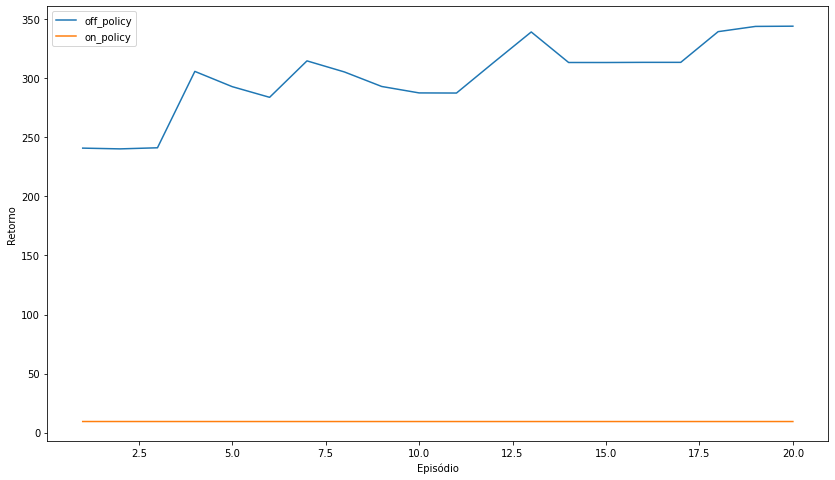

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def smooth(data, window):
    data = np.array(data)
    n = len(data)
    y = np.zeros(n)
    for i in range(n):
        start = max(0, i-window+1)
        y[i] = data[start:(i+1)].mean()
    return y

plt.figure(figsize=(14, 8))
xvalues = np.arange(1, len(temp_offpolicy)+1)
plt.plot(xvalues, smooth(temp_offpolicy, 10), label="off_policy")
xvalues = np.arange(1, len(temp_onnpolicy)+1)
plt.plot(xvalues, smooth(temp_onnpolicy, 10), label="on_policy")
plt.xlabel('Episódio')
plt.ylabel('Retorno')
plt.legend()
plt.show()

Executing <function run_nstep_sarsa_offPolicy at 0x7f73d1843d40>:


100%|██████████| 20/20 [1:00:52<00:00, 182.64s/it]


  (20 executions of n-step-sarsa-off-policy finished in 3652.78 secs)
Executing <function run_nstep_sarsa at 0x7f73d183d9e0>:


  0%|          | 0/20 [00:00<?, ?it/s]

Episode 100 Average Reward (last 100): 9.240
Episode 200 Average Reward (last 100): 9.350
Episode 300 Average Reward (last 100): 9.370
Episode 400 Average Reward (last 100): 9.340
Episode 500 Average Reward (last 100): 9.410
Episode 600 Average Reward (last 100): 9.140
Episode 700 Average Reward (last 100): 9.410
Episode 800 Average Reward (last 100): 9.490
Episode 900 Average Reward (last 100): 9.370
Episode 1000 Average Reward (last 100): 9.260
Episode 1100 Average Reward (last 100): 9.280
Episode 1200 Average Reward (last 100): 9.250
Episode 1300 Average Reward (last 100): 9.370
Episode 1400 Average Reward (last 100): 9.500
Episode 1500 Average Reward (last 100): 9.300
Episode 1600 Average Reward (last 100): 9.430
Episode 1700 Average Reward (last 100): 9.210
Episode 1800 Average Reward (last 100): 9.410
Episode 1900 Average Reward (last 100): 9.400
Episode 2000 Average Reward (last 100): 9.410
Episode 2100 Average Reward (last 100): 9.360
Episode 2200 Average Reward (last 100): 9.3

  5%|▌         | 1/20 [00:06<01:57,  6.20s/it]

Episode 9700 Average Reward (last 100): 9.350
Episode 9800 Average Reward (last 100): 9.350
Episode 9900 Average Reward (last 100): 9.420
Episode 10000 Average Reward (last 100): 9.450
Episode 100 Average Reward (last 100): 9.240
Episode 200 Average Reward (last 100): 9.330
Episode 300 Average Reward (last 100): 9.300
Episode 400 Average Reward (last 100): 9.460
Episode 500 Average Reward (last 100): 9.350
Episode 600 Average Reward (last 100): 9.380
Episode 700 Average Reward (last 100): 9.320
Episode 800 Average Reward (last 100): 9.420
Episode 900 Average Reward (last 100): 9.440
Episode 1000 Average Reward (last 100): 9.420
Episode 1100 Average Reward (last 100): 9.380
Episode 1200 Average Reward (last 100): 9.460
Episode 1300 Average Reward (last 100): 9.360
Episode 1400 Average Reward (last 100): 9.360
Episode 1500 Average Reward (last 100): 9.380
Episode 1600 Average Reward (last 100): 9.350
Episode 1700 Average Reward (last 100): 9.330
Episode 1800 Average Reward (last 100): 9.

 10%|█         | 2/20 [00:12<01:52,  6.24s/it]

Episode 9700 Average Reward (last 100): 9.340
Episode 9800 Average Reward (last 100): 9.360
Episode 9900 Average Reward (last 100): 9.400
Episode 10000 Average Reward (last 100): 9.400
Episode 100 Average Reward (last 100): 9.300
Episode 200 Average Reward (last 100): 9.370
Episode 300 Average Reward (last 100): 9.250
Episode 400 Average Reward (last 100): 9.310
Episode 500 Average Reward (last 100): 9.370
Episode 600 Average Reward (last 100): 9.430
Episode 700 Average Reward (last 100): 9.430
Episode 800 Average Reward (last 100): 9.390
Episode 900 Average Reward (last 100): 9.450
Episode 1000 Average Reward (last 100): 9.380
Episode 1100 Average Reward (last 100): 9.240
Episode 1200 Average Reward (last 100): 9.370
Episode 1300 Average Reward (last 100): 9.370
Episode 1400 Average Reward (last 100): 9.400
Episode 1500 Average Reward (last 100): 9.400
Episode 1600 Average Reward (last 100): 9.340
Episode 1700 Average Reward (last 100): 9.360
Episode 1800 Average Reward (last 100): 9.

 15%|█▌        | 3/20 [00:18<01:46,  6.25s/it]

Episode 10000 Average Reward (last 100): 9.360
Episode 100 Average Reward (last 100): 9.370
Episode 200 Average Reward (last 100): 9.370
Episode 300 Average Reward (last 100): 9.270
Episode 400 Average Reward (last 100): 9.480
Episode 500 Average Reward (last 100): 9.370
Episode 600 Average Reward (last 100): 9.400
Episode 700 Average Reward (last 100): 9.280
Episode 800 Average Reward (last 100): 9.360
Episode 900 Average Reward (last 100): 9.500
Episode 1000 Average Reward (last 100): 9.480
Episode 1100 Average Reward (last 100): 9.340
Episode 1200 Average Reward (last 100): 9.410
Episode 1300 Average Reward (last 100): 9.310
Episode 1400 Average Reward (last 100): 9.350
Episode 1500 Average Reward (last 100): 9.330
Episode 1600 Average Reward (last 100): 9.360
Episode 1700 Average Reward (last 100): 9.370
Episode 1800 Average Reward (last 100): 9.290
Episode 1900 Average Reward (last 100): 9.360
Episode 2000 Average Reward (last 100): 9.450
Episode 2100 Average Reward (last 100): 9.

 20%|██        | 4/20 [00:25<01:40,  6.26s/it]

Episode 10000 Average Reward (last 100): 9.410
Episode 100 Average Reward (last 100): 9.300
Episode 200 Average Reward (last 100): 9.340
Episode 300 Average Reward (last 100): 9.330
Episode 400 Average Reward (last 100): 9.340
Episode 500 Average Reward (last 100): 9.340
Episode 600 Average Reward (last 100): 9.290
Episode 700 Average Reward (last 100): 9.300
Episode 800 Average Reward (last 100): 9.410
Episode 900 Average Reward (last 100): 9.390
Episode 1000 Average Reward (last 100): 9.460
Episode 1100 Average Reward (last 100): 9.430
Episode 1200 Average Reward (last 100): 9.420
Episode 1300 Average Reward (last 100): 9.320
Episode 1400 Average Reward (last 100): 9.500
Episode 1500 Average Reward (last 100): 9.360
Episode 1600 Average Reward (last 100): 9.400
Episode 1700 Average Reward (last 100): 9.260
Episode 1800 Average Reward (last 100): 9.310
Episode 1900 Average Reward (last 100): 9.380
Episode 2000 Average Reward (last 100): 9.310
Episode 2100 Average Reward (last 100): 9.

 25%|██▌       | 5/20 [00:32<01:38,  6.57s/it]

Episode 9700 Average Reward (last 100): 9.390
Episode 9800 Average Reward (last 100): 9.390
Episode 9900 Average Reward (last 100): 9.290
Episode 10000 Average Reward (last 100): 9.340
Episode 100 Average Reward (last 100): 9.430
Episode 200 Average Reward (last 100): 9.390
Episode 300 Average Reward (last 100): 9.350
Episode 400 Average Reward (last 100): 9.410
Episode 500 Average Reward (last 100): 9.390
Episode 600 Average Reward (last 100): 9.370
Episode 700 Average Reward (last 100): 9.250
Episode 800 Average Reward (last 100): 9.290
Episode 900 Average Reward (last 100): 9.430
Episode 1000 Average Reward (last 100): 9.360
Episode 1100 Average Reward (last 100): 9.510
Episode 1200 Average Reward (last 100): 9.420
Episode 1300 Average Reward (last 100): 9.310
Episode 1400 Average Reward (last 100): 9.180
Episode 1500 Average Reward (last 100): 9.280
Episode 1600 Average Reward (last 100): 9.300
Episode 1700 Average Reward (last 100): 9.370
Episode 1800 Average Reward (last 100): 9.

 30%|███       | 6/20 [00:38<01:31,  6.52s/it]

Episode 9700 Average Reward (last 100): 9.360
Episode 9800 Average Reward (last 100): 9.350
Episode 9900 Average Reward (last 100): 9.310
Episode 10000 Average Reward (last 100): 9.330
Episode 100 Average Reward (last 100): 9.370
Episode 200 Average Reward (last 100): 9.330
Episode 300 Average Reward (last 100): 9.300
Episode 400 Average Reward (last 100): 9.320
Episode 500 Average Reward (last 100): 9.360
Episode 600 Average Reward (last 100): 9.490
Episode 700 Average Reward (last 100): 9.280
Episode 800 Average Reward (last 100): 9.220
Episode 900 Average Reward (last 100): 9.410
Episode 1000 Average Reward (last 100): 9.370
Episode 1100 Average Reward (last 100): 9.410
Episode 1200 Average Reward (last 100): 9.410
Episode 1300 Average Reward (last 100): 9.210
Episode 1400 Average Reward (last 100): 9.430
Episode 1500 Average Reward (last 100): 9.400
Episode 1600 Average Reward (last 100): 9.460
Episode 1700 Average Reward (last 100): 9.330
Episode 1800 Average Reward (last 100): 9.

 35%|███▌      | 7/20 [00:44<01:22,  6.38s/it]

Episode 9900 Average Reward (last 100): 9.570
Episode 10000 Average Reward (last 100): 9.490
Episode 100 Average Reward (last 100): 9.440
Episode 200 Average Reward (last 100): 9.300
Episode 300 Average Reward (last 100): 9.260
Episode 400 Average Reward (last 100): 9.360
Episode 500 Average Reward (last 100): 9.350
Episode 600 Average Reward (last 100): 9.230
Episode 700 Average Reward (last 100): 9.280
Episode 800 Average Reward (last 100): 9.200
Episode 900 Average Reward (last 100): 9.180
Episode 1000 Average Reward (last 100): 9.360
Episode 1100 Average Reward (last 100): 9.270
Episode 1200 Average Reward (last 100): 9.340
Episode 1300 Average Reward (last 100): 9.360
Episode 1400 Average Reward (last 100): 9.360
Episode 1500 Average Reward (last 100): 9.290
Episode 1600 Average Reward (last 100): 9.260
Episode 1700 Average Reward (last 100): 9.500
Episode 1800 Average Reward (last 100): 9.450
Episode 1900 Average Reward (last 100): 9.420
Episode 2000 Average Reward (last 100): 9.

 40%|████      | 8/20 [00:50<01:15,  6.30s/it]

Episode 10000 Average Reward (last 100): 9.300
Episode 100 Average Reward (last 100): 9.230
Episode 200 Average Reward (last 100): 9.110
Episode 300 Average Reward (last 100): 9.370
Episode 400 Average Reward (last 100): 9.150
Episode 500 Average Reward (last 100): 9.310
Episode 600 Average Reward (last 100): 9.380
Episode 700 Average Reward (last 100): 9.420
Episode 800 Average Reward (last 100): 9.350
Episode 900 Average Reward (last 100): 9.210
Episode 1000 Average Reward (last 100): 9.380
Episode 1100 Average Reward (last 100): 9.450
Episode 1200 Average Reward (last 100): 9.410
Episode 1300 Average Reward (last 100): 9.360
Episode 1400 Average Reward (last 100): 9.300
Episode 1500 Average Reward (last 100): 9.270
Episode 1600 Average Reward (last 100): 9.270
Episode 1700 Average Reward (last 100): 9.360
Episode 1800 Average Reward (last 100): 9.380
Episode 1900 Average Reward (last 100): 9.410
Episode 2000 Average Reward (last 100): 9.310
Episode 2100 Average Reward (last 100): 9.

 45%|████▌     | 9/20 [00:56<01:08,  6.27s/it]

Episode 10000 Average Reward (last 100): 9.300
Episode 100 Average Reward (last 100): 9.290
Episode 200 Average Reward (last 100): 9.420
Episode 300 Average Reward (last 100): 9.270
Episode 400 Average Reward (last 100): 9.320
Episode 500 Average Reward (last 100): 9.350
Episode 600 Average Reward (last 100): 9.450
Episode 700 Average Reward (last 100): 9.380
Episode 800 Average Reward (last 100): 9.430
Episode 900 Average Reward (last 100): 9.550
Episode 1000 Average Reward (last 100): 9.260
Episode 1100 Average Reward (last 100): 9.450
Episode 1200 Average Reward (last 100): 9.470
Episode 1300 Average Reward (last 100): 9.450
Episode 1400 Average Reward (last 100): 9.290
Episode 1500 Average Reward (last 100): 9.360
Episode 1600 Average Reward (last 100): 9.280
Episode 1700 Average Reward (last 100): 9.450
Episode 1800 Average Reward (last 100): 9.370
Episode 1900 Average Reward (last 100): 9.330
Episode 2000 Average Reward (last 100): 9.360
Episode 2100 Average Reward (last 100): 9.

 50%|█████     | 10/20 [01:03<01:02,  6.24s/it]

Episode 9700 Average Reward (last 100): 9.400
Episode 9800 Average Reward (last 100): 9.300
Episode 9900 Average Reward (last 100): 9.330
Episode 10000 Average Reward (last 100): 9.180
Episode 100 Average Reward (last 100): 9.430
Episode 200 Average Reward (last 100): 9.430
Episode 300 Average Reward (last 100): 9.380
Episode 400 Average Reward (last 100): 9.380
Episode 500 Average Reward (last 100): 9.280
Episode 600 Average Reward (last 100): 9.310
Episode 700 Average Reward (last 100): 9.310
Episode 800 Average Reward (last 100): 9.260
Episode 900 Average Reward (last 100): 9.470
Episode 1000 Average Reward (last 100): 9.410
Episode 1100 Average Reward (last 100): 9.400
Episode 1200 Average Reward (last 100): 9.400
Episode 1300 Average Reward (last 100): 9.240
Episode 1400 Average Reward (last 100): 9.390
Episode 1500 Average Reward (last 100): 9.340
Episode 1600 Average Reward (last 100): 9.410
Episode 1700 Average Reward (last 100): 9.440
Episode 1800 Average Reward (last 100): 9.

 55%|█████▌    | 11/20 [01:09<00:55,  6.22s/it]

Episode 9700 Average Reward (last 100): 9.230
Episode 9800 Average Reward (last 100): 9.390
Episode 9900 Average Reward (last 100): 9.340
Episode 10000 Average Reward (last 100): 9.270
Episode 100 Average Reward (last 100): 9.300
Episode 200 Average Reward (last 100): 9.200
Episode 300 Average Reward (last 100): 9.340
Episode 400 Average Reward (last 100): 9.350
Episode 500 Average Reward (last 100): 9.410
Episode 600 Average Reward (last 100): 9.310
Episode 700 Average Reward (last 100): 9.300
Episode 800 Average Reward (last 100): 9.310
Episode 900 Average Reward (last 100): 9.360
Episode 1000 Average Reward (last 100): 9.300
Episode 1100 Average Reward (last 100): 9.400
Episode 1200 Average Reward (last 100): 9.490
Episode 1300 Average Reward (last 100): 9.350
Episode 1400 Average Reward (last 100): 9.300
Episode 1500 Average Reward (last 100): 9.240
Episode 1600 Average Reward (last 100): 9.250
Episode 1700 Average Reward (last 100): 9.290
Episode 1800 Average Reward (last 100): 9.

 60%|██████    | 12/20 [01:15<00:49,  6.25s/it]

Episode 10000 Average Reward (last 100): 9.340
Episode 100 Average Reward (last 100): 9.410
Episode 200 Average Reward (last 100): 9.330
Episode 300 Average Reward (last 100): 9.410
Episode 400 Average Reward (last 100): 9.390
Episode 500 Average Reward (last 100): 9.340
Episode 600 Average Reward (last 100): 9.450
Episode 700 Average Reward (last 100): 9.290
Episode 800 Average Reward (last 100): 9.350
Episode 900 Average Reward (last 100): 9.250
Episode 1000 Average Reward (last 100): 9.380
Episode 1100 Average Reward (last 100): 9.440
Episode 1200 Average Reward (last 100): 9.350
Episode 1300 Average Reward (last 100): 9.370
Episode 1400 Average Reward (last 100): 9.430
Episode 1500 Average Reward (last 100): 9.380
Episode 1600 Average Reward (last 100): 9.450
Episode 1700 Average Reward (last 100): 9.280
Episode 1800 Average Reward (last 100): 9.310
Episode 1900 Average Reward (last 100): 9.350
Episode 2000 Average Reward (last 100): 9.270
Episode 2100 Average Reward (last 100): 9.

 65%|██████▌   | 13/20 [01:21<00:43,  6.25s/it]

Episode 9800 Average Reward (last 100): 9.300
Episode 9900 Average Reward (last 100): 9.290
Episode 10000 Average Reward (last 100): 9.360
Episode 100 Average Reward (last 100): 9.340
Episode 200 Average Reward (last 100): 9.300
Episode 300 Average Reward (last 100): 9.390
Episode 400 Average Reward (last 100): 9.350
Episode 500 Average Reward (last 100): 9.340
Episode 600 Average Reward (last 100): 9.440
Episode 700 Average Reward (last 100): 9.430
Episode 800 Average Reward (last 100): 9.470
Episode 900 Average Reward (last 100): 9.300
Episode 1000 Average Reward (last 100): 9.240
Episode 1100 Average Reward (last 100): 9.330
Episode 1200 Average Reward (last 100): 9.290
Episode 1300 Average Reward (last 100): 9.260
Episode 1400 Average Reward (last 100): 9.440
Episode 1500 Average Reward (last 100): 9.430
Episode 1600 Average Reward (last 100): 9.380
Episode 1700 Average Reward (last 100): 9.420
Episode 1800 Average Reward (last 100): 9.380
Episode 1900 Average Reward (last 100): 9.

 70%|███████   | 14/20 [01:28<00:37,  6.23s/it]

Episode 9800 Average Reward (last 100): 9.480
Episode 9900 Average Reward (last 100): 9.190
Episode 10000 Average Reward (last 100): 9.520
Episode 100 Average Reward (last 100): 9.330
Episode 200 Average Reward (last 100): 9.290
Episode 300 Average Reward (last 100): 9.360
Episode 400 Average Reward (last 100): 9.330
Episode 500 Average Reward (last 100): 9.440
Episode 600 Average Reward (last 100): 9.210
Episode 700 Average Reward (last 100): 9.380
Episode 800 Average Reward (last 100): 9.390
Episode 900 Average Reward (last 100): 9.380
Episode 1000 Average Reward (last 100): 9.400
Episode 1100 Average Reward (last 100): 9.520
Episode 1200 Average Reward (last 100): 9.370
Episode 1300 Average Reward (last 100): 9.300
Episode 1400 Average Reward (last 100): 9.430
Episode 1500 Average Reward (last 100): 9.390
Episode 1600 Average Reward (last 100): 9.360
Episode 1700 Average Reward (last 100): 9.230
Episode 1800 Average Reward (last 100): 9.440
Episode 1900 Average Reward (last 100): 9.

 75%|███████▌  | 15/20 [01:34<00:31,  6.23s/it]

Episode 9600 Average Reward (last 100): 9.380
Episode 9700 Average Reward (last 100): 9.430
Episode 9800 Average Reward (last 100): 9.430
Episode 9900 Average Reward (last 100): 9.420
Episode 10000 Average Reward (last 100): 9.420
Episode 100 Average Reward (last 100): 9.370
Episode 200 Average Reward (last 100): 9.350
Episode 300 Average Reward (last 100): 9.390
Episode 400 Average Reward (last 100): 9.320
Episode 500 Average Reward (last 100): 9.310
Episode 600 Average Reward (last 100): 9.290
Episode 700 Average Reward (last 100): 9.380
Episode 800 Average Reward (last 100): 9.340
Episode 900 Average Reward (last 100): 9.330
Episode 1000 Average Reward (last 100): 9.330
Episode 1100 Average Reward (last 100): 9.440
Episode 1200 Average Reward (last 100): 9.430
Episode 1300 Average Reward (last 100): 9.260
Episode 1400 Average Reward (last 100): 9.480
Episode 1500 Average Reward (last 100): 9.310
Episode 1600 Average Reward (last 100): 9.320
Episode 1700 Average Reward (last 100): 9.

 80%|████████  | 16/20 [01:40<00:25,  6.32s/it]

Episode 9800 Average Reward (last 100): 9.340
Episode 9900 Average Reward (last 100): 9.300
Episode 10000 Average Reward (last 100): 9.440
Episode 100 Average Reward (last 100): 9.360
Episode 200 Average Reward (last 100): 9.360
Episode 300 Average Reward (last 100): 9.320
Episode 400 Average Reward (last 100): 9.400
Episode 500 Average Reward (last 100): 9.420
Episode 600 Average Reward (last 100): 9.250
Episode 700 Average Reward (last 100): 9.350
Episode 800 Average Reward (last 100): 9.320
Episode 900 Average Reward (last 100): 9.400
Episode 1000 Average Reward (last 100): 9.430
Episode 1100 Average Reward (last 100): 9.390
Episode 1200 Average Reward (last 100): 9.450
Episode 1300 Average Reward (last 100): 9.380
Episode 1400 Average Reward (last 100): 9.340
Episode 1500 Average Reward (last 100): 9.450
Episode 1600 Average Reward (last 100): 9.330
Episode 1700 Average Reward (last 100): 9.380
Episode 1800 Average Reward (last 100): 9.300
Episode 1900 Average Reward (last 100): 9.

 85%|████████▌ | 17/20 [01:46<00:18,  6.09s/it]

Episode 9700 Average Reward (last 100): 9.340
Episode 9800 Average Reward (last 100): 9.300
Episode 9900 Average Reward (last 100): 9.550
Episode 10000 Average Reward (last 100): 9.310
Episode 100 Average Reward (last 100): 9.340
Episode 200 Average Reward (last 100): 9.360
Episode 300 Average Reward (last 100): 9.360
Episode 400 Average Reward (last 100): 9.500
Episode 500 Average Reward (last 100): 9.260
Episode 600 Average Reward (last 100): 9.340
Episode 700 Average Reward (last 100): 9.410
Episode 800 Average Reward (last 100): 9.300
Episode 900 Average Reward (last 100): 9.400
Episode 1000 Average Reward (last 100): 9.200
Episode 1100 Average Reward (last 100): 9.360
Episode 1200 Average Reward (last 100): 9.390
Episode 1300 Average Reward (last 100): 9.270
Episode 1400 Average Reward (last 100): 9.380
Episode 1500 Average Reward (last 100): 9.320
Episode 1600 Average Reward (last 100): 9.410
Episode 1700 Average Reward (last 100): 9.430
Episode 1800 Average Reward (last 100): 9.

 90%|█████████ | 18/20 [01:52<00:11,  5.94s/it]

Episode 9800 Average Reward (last 100): 9.280
Episode 9900 Average Reward (last 100): 9.310
Episode 10000 Average Reward (last 100): 9.380
Episode 100 Average Reward (last 100): 9.460
Episode 200 Average Reward (last 100): 9.320
Episode 300 Average Reward (last 100): 9.280
Episode 400 Average Reward (last 100): 9.370
Episode 500 Average Reward (last 100): 9.310
Episode 600 Average Reward (last 100): 9.280
Episode 700 Average Reward (last 100): 9.240
Episode 800 Average Reward (last 100): 9.370
Episode 900 Average Reward (last 100): 9.430
Episode 1000 Average Reward (last 100): 9.360
Episode 1100 Average Reward (last 100): 9.380
Episode 1200 Average Reward (last 100): 9.270
Episode 1300 Average Reward (last 100): 9.340
Episode 1400 Average Reward (last 100): 9.490
Episode 1500 Average Reward (last 100): 9.290
Episode 1600 Average Reward (last 100): 9.510
Episode 1700 Average Reward (last 100): 9.340
Episode 1800 Average Reward (last 100): 9.260
Episode 1900 Average Reward (last 100): 9.

 95%|█████████▌| 19/20 [01:57<00:05,  5.82s/it]

Episode 9700 Average Reward (last 100): 9.350
Episode 9800 Average Reward (last 100): 9.400
Episode 9900 Average Reward (last 100): 9.310
Episode 10000 Average Reward (last 100): 9.420
Episode 100 Average Reward (last 100): 9.380
Episode 200 Average Reward (last 100): 9.230
Episode 300 Average Reward (last 100): 9.260
Episode 400 Average Reward (last 100): 9.350
Episode 500 Average Reward (last 100): 9.390
Episode 600 Average Reward (last 100): 9.440
Episode 700 Average Reward (last 100): 9.370
Episode 800 Average Reward (last 100): 9.320
Episode 900 Average Reward (last 100): 9.420
Episode 1000 Average Reward (last 100): 9.250
Episode 1100 Average Reward (last 100): 9.280
Episode 1200 Average Reward (last 100): 9.360
Episode 1300 Average Reward (last 100): 9.280
Episode 1400 Average Reward (last 100): 9.360
Episode 1500 Average Reward (last 100): 9.380
Episode 1600 Average Reward (last 100): 9.300
Episode 1700 Average Reward (last 100): 9.470
Episode 1800 Average Reward (last 100): 9.

100%|██████████| 20/20 [02:03<00:00,  6.16s/it]

Episode 9700 Average Reward (last 100): 9.290
Episode 9800 Average Reward (last 100): 9.350
Episode 9900 Average Reward (last 100): 9.410
Episode 10000 Average Reward (last 100): 9.330
  (20 executions of n-step-sarsa-on-policy finished in 123.27 secs)


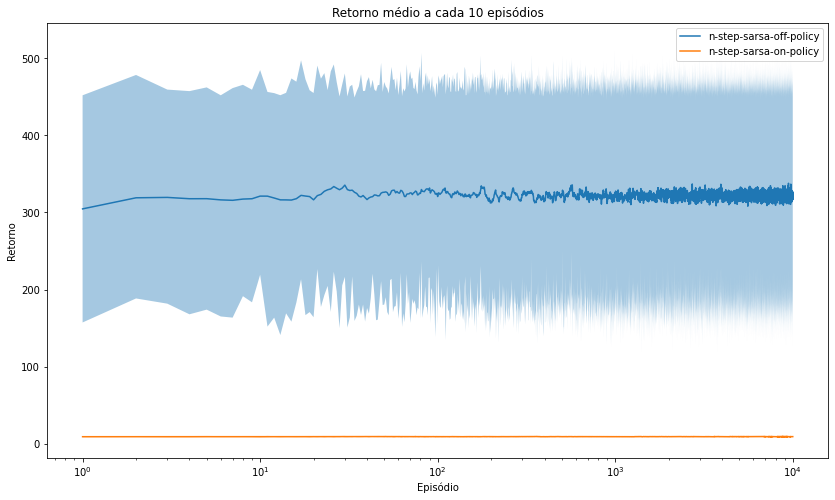

In [ ]:
# baseado em episodios
all_results = []

resultsOffPolicy = repeated_exec(20, 'n-step-sarsa-off-policy',
                                    run_nstep_sarsa_offPolicy, env, EPISODES, NSTEPS, LR, GAMMA, EPSILON)
all_results.append(resultsOffPolicy)

resultsOnPolicy = repeated_exec(20, 'n-step-sarsa-on-policy',
                                    run_nstep_sarsa, env, EPISODES, NSTEPS, LR, GAMMA, EPSILON)
all_results.append(resultsOnPolicy)

plot_multiple_results(all_results, cumulative=False,
                         x_log_scale=True, plot_stddev=True, return_type='episode')

#N-Step off-policy control variate x N-Step on-policy Cartpole

/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


Loading results from results/_CartPoleEnv_CartPole-v1__-n-step-sarsa-off-policy_controlVariate-episodes2000-execs20.npy
Loading results from results/_CartPoleEnv_CartPole-v1__-n-step-sarsa-on-policy-episodes2000-execs20.npy


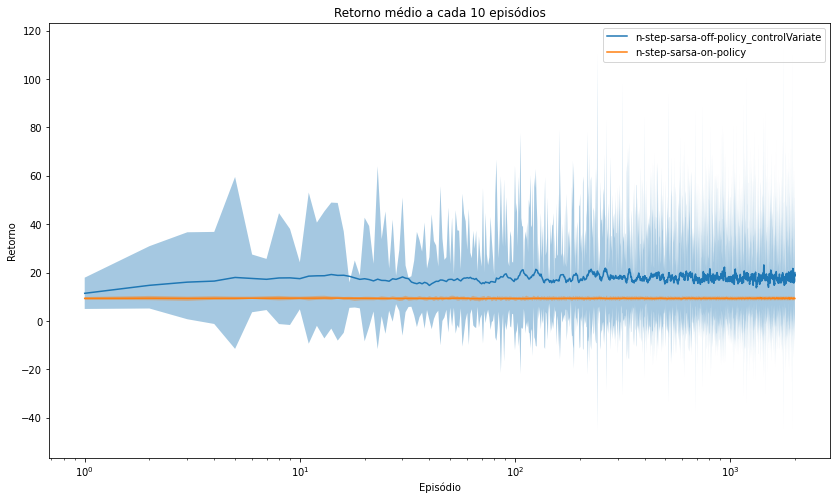

In [ ]:
ENV_NAME = "CartPole-v1"
r_max_plot = 10
EPISODES = 10000
LR = 0.11422703163526324
GAMMA =  0.6892685851849248
EPSILON = 1
NSTEPS = 5
B1 = 7
B2= 34
B3= 95
B4 = 84

env = gym.make(ENV_NAME)
env = DiscreteObservationWrapper(env, [B1,B2,B3,B4])


all_results = []

resultsOffPolicy = repeated_exec(20, 'n-step-sarsa-off-policy_controlVariate',
                                    run_nstep_sarsa_offPolicy_control_variate, env, EPISODES, NSTEPS, LR, GAMMA, EPSILON)
all_results.append(resultsOffPolicy)

resultsOnPolicy = repeated_exec(20, 'n-step-sarsa-on-policy',
                                    run_nstep_sarsa, env, EPISODES, NSTEPS, LR, GAMMA, EPSILON)
all_results.append(resultsOnPolicy)

plot_multiple_results(all_results, cumulative=False,
                         x_log_scale=True, plot_stddev=True, return_type='episode')

#N-Step off-policy control variate x N-Step off-policy cartpole

In [ ]:
ENV_NAME = "CartPole-v1"
r_max_plot = 10
EPISODES = 2000
LR = 0.23
GAMMA =  0.31
EPSILON = 1
NSTEPS = 2
B1 = 36
B2= 75
B3= 9
B4 = 92

env = gym.make(ENV_NAME)

/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


Loading results from results/_CartPoleEnv_CartPole-v1__-n-step-sarsa-off-policy_controlVariate-episodes2000-execs20.npy
Loading results from results/_CartPoleEnv_CartPole-v1__-n-step-sarsa-off-policy-episodes2000-execs20.npy


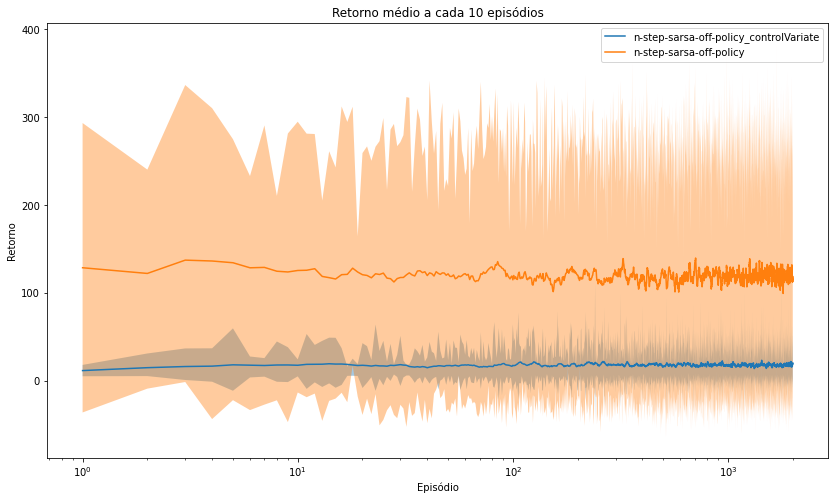

In [ ]:
#episodes
all_results = []

resultsOffPolicyControl = repeated_exec(20, 'n-step-sarsa-off-policy_controlVariate',
                                    run_nstep_sarsa_offPolicy_control_variate, env, EPISODES, NSTEPS, LR, GAMMA, EPSILON)
all_results.append(resultsOffPolicyControl)

resultsOffPolicy = repeated_exec(20, 'n-step-sarsa-off-policy',
                                    run_nstep_sarsa_offPolicy, env, EPISODES, NSTEPS, LR, GAMMA, EPSILON)
all_results.append(resultsOffPolicy)

plot_multiple_results(all_results, cumulative=False,
                         x_log_scale=True, plot_stddev=True, return_type='episode')

#N-Step off-policy x N-Step on-policy Taxi

/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


Loading results from results/_TaxiEnv_Taxi-v3__-n-step-sarsa-off-policy-episodes2000-execs20.npy
Loading results from results/_TaxiEnv_Taxi-v3__-n-step-sarsa-on-policy-episodes2000-execs20.npy


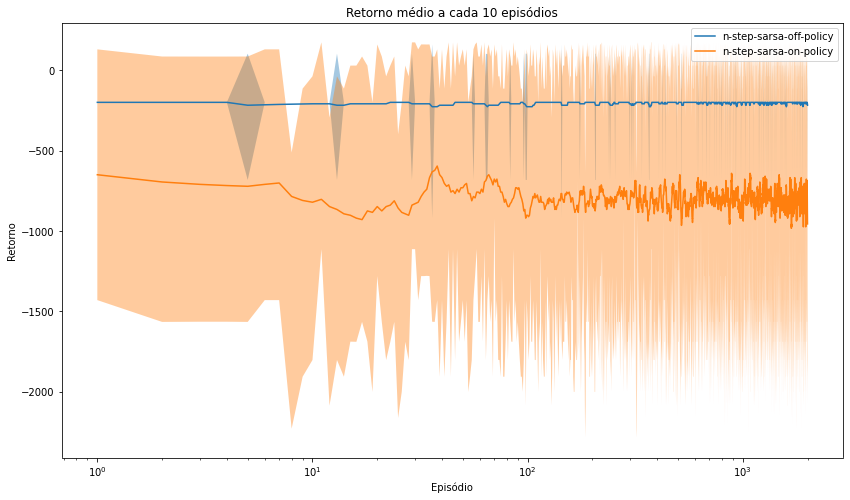

In [ ]:
ENV_NAME = "Taxi-v3"
r_max_plot = 10
EPISODES = 2000
LR = 0.97
GAMMA = 0.56
EPSILON = 1
NSTEPS = 287


env = gym.make(ENV_NAME)

all_results = []

resultsOffPolicy = repeated_exec(20, 'n-step-sarsa-off-policy',
                                    run_nstep_sarsa_offPolicy, env, EPISODES, NSTEPS, LR, GAMMA, EPSILON)
all_results.append(resultsOffPolicy)

resultsOnPolicy = repeated_exec(20, 'n-step-sarsa-on-policy',
                                    run_nstep_sarsa, env, EPISODES, NSTEPS, LR, GAMMA, EPSILON)
all_results.append(resultsOnPolicy)

plot_multiple_results(all_results, cumulative=False,
                         x_log_scale=True, plot_stddev=True, return_type='episode')

#N-Step off-policy control variate x N-Step on-policy Taxi

/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


Loading results from results/_TaxiEnv_Taxi-v3__-n-step-sarsa-off-policy_controlVariate-episodes2000-execs20.npy
Loading results from results/_TaxiEnv_Taxi-v3__-n-step-sarsa-on-policy-episodes2000-execs20.npy


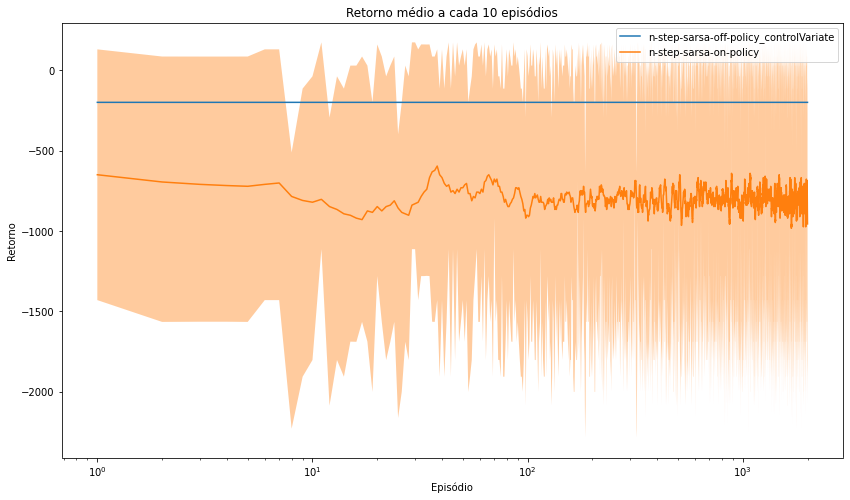

In [ ]:
ENV_NAME = "Taxi-v3"
r_max_plot = 10
EPISODES = 2000
LR = 0.31
GAMMA =  0.91
EPSILON = 1
NSTEPS = 18

env = gym.make(ENV_NAME)


all_results = []

resultsOffPolicy = repeated_exec(20, 'n-step-sarsa-off-policy_controlVariate',
                                    run_nstep_sarsa_offPolicy_control_variate, env, EPISODES, NSTEPS, LR, GAMMA, EPSILON)
all_results.append(resultsOffPolicy)

resultsOnPolicy = repeated_exec(20, 'n-step-sarsa-on-policy',
                                    run_nstep_sarsa, env, EPISODES, NSTEPS, LR, GAMMA, EPSILON)
all_results.append(resultsOnPolicy)

plot_multiple_results(all_results, cumulative=False,
                         x_log_scale=True, plot_stddev=True, return_type='episode')

#N-Step off-policy control variate x N-Step off-policy Taxi



/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


Loading results from results/_TaxiEnv_Taxi-v3__-n-step-sarsa-off-policy_controlVariate-episodes2000-execs20.npy
Loading results from results/_TaxiEnv_Taxi-v3__-n-step-sarsa-off-policy-episodes2000-execs20.npy


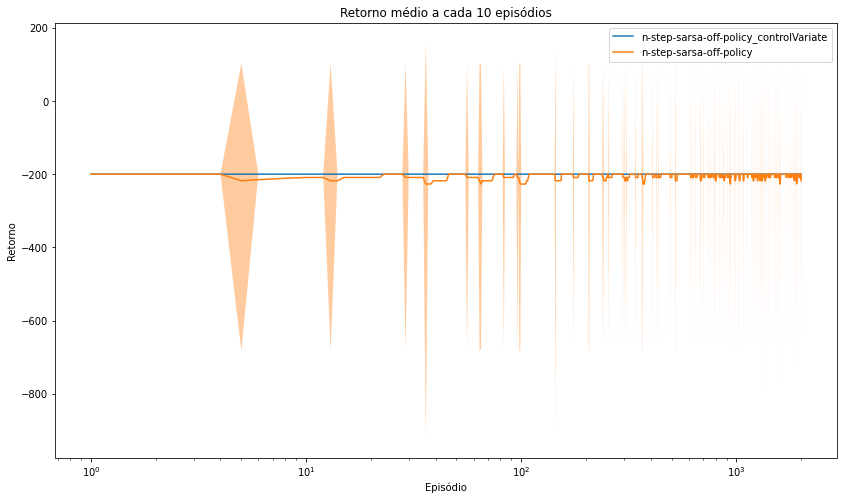

In [ ]:
ENV_NAME = "Taxi-v3"
r_max_plot = 10
EPISODES = 2000
LR = 0.31
GAMMA =  0.91
EPSILON = 1
NSTEPS = 18

env = gym.make(ENV_NAME)


all_results = []

resultsOffPolicyControl = repeated_exec(20, 'n-step-sarsa-off-policy_controlVariate',
                                    run_nstep_sarsa_offPolicy_control_variate, env, EPISODES, NSTEPS, LR, GAMMA, EPSILON)
all_results.append(resultsOffPolicyControl)

resultsOffPolicy = repeated_exec(20, 'n-step-sarsa-off-policy',
                                    run_nstep_sarsa_offPolicy, env, EPISODES, NSTEPS, LR, GAMMA, EPSILON)
all_results.append(resultsOffPolicy)

plot_multiple_results(all_results, cumulative=False,
                         x_log_scale=True, plot_stddev=True, return_type='episode')